Yiğithan Kardaş<br>
201101003<br>
y.kardas@etu.edu.tr

# YAP 470 Proje

Veri setine göre eğitilecek olan modelin, öğrencilerin başarısını tahmin etmesi beklenen bir Makine Öğrenmesi projesidir.

## Exploratory Data Analysis

Gerekli kütüphaneleri *import* edelim.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Eğitim verisini dosyadan okuyoruz ve *DataFrame*'e çeviriyoruz.

In [3]:
df = pd.read_csv('./data.csv')

Veri setinde __234__ satır ve __33__ sütun var.

In [4]:
df.shape

(234, 33)

Veri setinde görüldüğü üzere sadece sayısal değerler yok, *string* tipinde değerler de var.

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Bunu, sütun tiplerine bakarak da doğruluyoruz.

In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Bizim bu veri setinde amacımız, __G3__ hariç geri kalan 32 sütunla modeli eğitip test verilerinde __G3__ değerini tahmin etmek.

Veri setindeki sütunların açıklamarı şunlardır:


- __school__: Öğrencinin okulu
    - __GP__: Gabriel Pereira
    - __MS__: Mousinho da Silveira
- __sex__: Öğrencinin cinsiyeti
    - __F__: Kadın
    - __M__: Erkek
- __age__: Öğrencinin yaşı
- __address__: Öğrencinin adresi
    - __U__: Urban(Kent)
    - __R__: Rural(Kırsal)
- __famsize__: Öğrencinin aile büyüklüğü
    - __GT3__: 3'ten fazla
    - __LE3__: 3'ten az
- __Pstatus__: Ebeveynlerin birlikte yaşama durumu
    - __A__: Ayrı
    - __T__: Birlikte
- __Medu__: Annenin öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Fedu__: Babanın öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Mjob__: Annenin mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __Fjob__: Babanın mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __reason__: Bu okulu tercih etme sebebi
    - __course__: Kurs tercihi
    - __home__: Eve yakınlık
    - __reputation__: Okulun itibarı/ünü
    - __other__: Diğer
- __guardian__: Öğrencinin velisi
    - __mother__: Anne
    - __father__: Baba
    - __other__: Diğer
- __traveltime__: Evden okula gelme süresi
    - __1__: 15 dakikadan az
    - __2__: 15 - 30 dakika arası
    - __3__: 30 - 60 dakika arası
    - __4__: 1 saatten fazla
- __studytime__: Öğrencinin haftalık çalışma saati
    - __1__: 2 saatten az
    - __2__: 2 - 5 saat arası
    - __3__: 5 - 10 saat arası
    - __4__: 10 saatten fazla
- __failures__: Geçmişte başarısız olunan ders sayısı
    - __0__: 0
    - __1__: 1
    - __2__: 2
    - __3__: 3
- __schoolsup__: Ekstra öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __famsup__: Ailenin öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __paid__: Ders konusu dahilinde ekstra ücretli dersler (Matematik veya Portekizce)
    - __yes__: Var
    - __no__: Yok
- __activities__: Müfredat dışı etkinlikler
    - __yes__: Var
    - __no__: Yok
- __nursery__: Öğrenci anaokuluna gitti mi?
    - __yes__: Evet
    - __no__: Hayır
- __higher__: Öğrenci yükseköğrenim görmek istiyor mu?
    - __yes__: Evet
    - __no__: Hayır
- __internet__: Öğrencinin evde internet erişimi var mı?
    - __yes__: Evet
    - __no__: Hayır
- __romantic__: Öğrencinin romantik ilişkisi var mı?
    - __yes__: vVar
    - __no__: Yok
- __famrel__: Öğrencinin ailesiyle ilişkisinin kalitesi
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __freetime__: Öğrencinin okuldan sonra boş zamanı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __goout__: Öğrencinin arkadaşlarıyla dışarı çıkma sıklığı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Dalc__: Öğrencinin hafta içi alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Walc__: Öğrencinin hafta sonu alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __health__: Öğrencinin sağlık durumu
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __absences__: Öğrencinin devamsızlık sayısı
- __G1__: Öğrencinin 1. sınav notu
- __G2__: Öğrencinin 2. sınav notu
- __G3__: Öğrencinin final notu

Tüm *string*'leri sayısal veriye çevirdik.

In [7]:
df['school'] = df['school'].map({'GP': 0, 'MS': 1})
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['address'] = df['address'].map({'U': 0, 'R': 1})
df['famsize'] = df['famsize'].map({'GT3': 0, 'LE3': 1})
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
df['Mjob'] = df['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
df['Fjob'] = df['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})
df['reason'] = df['reason'].map({'course':1,'reputation':2,'home':3,'other':4})
df['guardian'] = df['guardian'].map({'mother':1,'father':2,'other':3})
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
df['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,3,3,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,3,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,3,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,5,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,17,0,0,0,2,1,1,1,...,3,2,3,1,2,3,10,12,10,12
230,0,0,17,0,1,1,4,3,5,1,...,3,2,3,1,2,3,14,13,13,14
231,0,1,17,1,0,1,2,2,1,1,...,4,5,2,1,1,1,4,11,11,11
232,0,1,17,0,0,1,4,4,4,3,...,4,5,5,1,3,2,14,11,9,9


Veri setinde *NaN* veir yok.

In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Veri setinde birbirinin kopyası olan herhangi iki veri yok.

In [9]:
df.duplicated().sum()

0

Veri setindeki korelasyonlar.

In [10]:
df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.000000,-0.029715,0.045883,0.083033,0.060323,1.037615e-01,0.070767,0.064474,-0.023819,...,0.063331,0.238414,0.048087,0.219068,0.188852,0.154685,-0.115978,0.215108,0.146356,0.134181
age,NaN,-0.029715,1.000000,0.046713,0.007411,0.091170,-2.112783e-01,-0.135488,-0.115156,-0.113993,...,-0.013891,-0.038131,0.212286,0.089576,0.227664,0.017874,0.212628,-0.246938,-0.278679,-0.239473
address,NaN,0.045883,0.046713,1.000000,-0.090483,0.117551,-1.124024e-01,-0.049781,0.034325,-0.005065,...,-0.054169,-0.123647,-0.047910,0.008771,0.079275,0.044950,0.012469,-0.079156,-0.153897,-0.150991
famsize,NaN,0.083033,0.007411,-0.090483,1.000000,-0.101965,-4.946866e-02,-0.088249,0.024403,0.006219,...,0.055746,0.042240,0.069670,0.121589,0.176764,0.016639,0.071656,0.058410,0.083550,0.076808
Pstatus,NaN,0.060323,0.091170,0.117551,-0.101965,1.000000,-1.054721e-01,-0.092508,0.113615,-0.042145,...,0.049626,0.048996,-0.020431,-0.029980,0.039325,0.085833,-0.012450,0.008790,-0.024786,-0.045081
Medu,NaN,0.103761,-0.211278,-0.112402,-0.049469,-0.105472,1.000000e+00,0.629690,0.370204,0.220258,...,-0.020296,0.083988,0.009525,0.047297,-0.068952,-0.086724,0.066550,0.281932,0.269387,0.249083
Fedu,NaN,0.070767,-0.135488,-0.049781,-0.088249,-0.092508,6.296896e-01,1.000000,0.192997,0.366124,...,0.022188,0.043862,-0.010374,0.046624,-0.007299,0.025574,0.041070,0.220920,0.167136,0.148439
Mjob,NaN,0.064474,-0.115156,0.034325,0.024403,0.113615,3.702042e-01,0.192997,1.000000,0.235342,...,-0.081078,0.028547,-0.031202,0.024460,0.040331,0.018761,-0.076757,0.194200,0.123355,0.113482
Fjob,NaN,-0.023819,-0.113993,-0.005065,0.006219,-0.042145,2.202575e-01,0.366124,0.235342,1.000000,...,-0.006120,0.043091,0.019585,0.037535,-0.117583,0.140010,-0.049629,0.125880,0.057411,0.050437


*G1 - G3* ve *G2 - G3* grafiği.

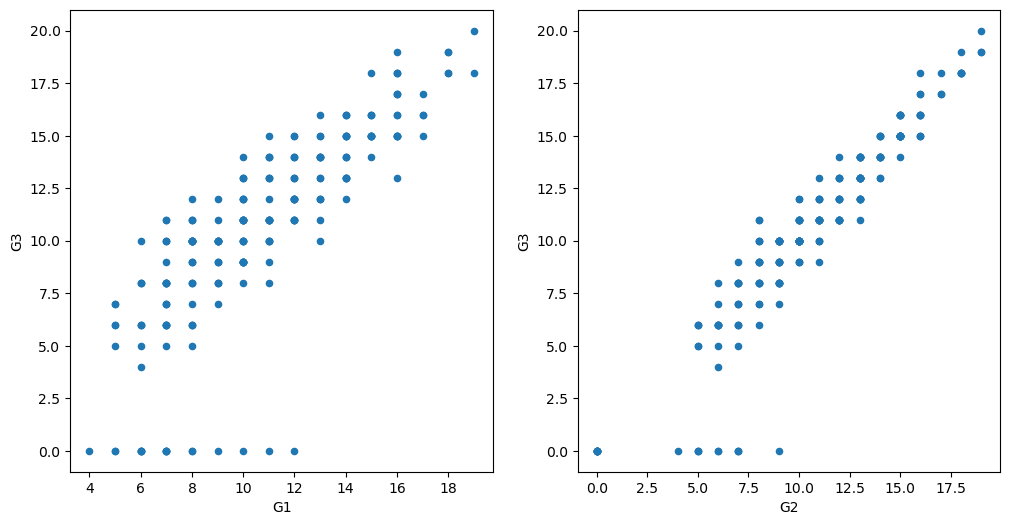

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df.plot(kind='scatter', x='G1', y='G3', ax=axes[0])
df.plot(kind='scatter', x='G2', y='G3', ax=axes[1])
plt.show()

# Önişleme

Verileri matris ve vektörlere çevirdik.

In [12]:
X = df.values.tolist()
y = [];
column_length = len(X[0])
for row in X:
    y.append(int(row[column_length - 1]));
    del row[column_length - 1];

X=pd.Series(X).tolist();
y=pd.Series(y).tolist();

Öznitelik seçimi işlemi.

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

eclf = ExtraTreesClassifier(n_estimators=50)
eclf = eclf.fit(X, y)
model = SelectFromModel(eclf, prefit=True)
selected_features = model.get_support()
selected_feature_indices = [i for i, val in enumerate(selected_features) if val]
X = model.transform(X)
X.shape

(234, 13)

Eğitim ve test verisinin ayrılması.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri Eğitmek

Gerekli model ve çapraz doğrulamaları __import__ ediyoruz.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import time

__*DecisionTreeRegressor*__ modelinin çapraz doğrulamayla eğitilmesi ve modelin $R^2$ skoru.

In [16]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=10)
dtr_time = time.time()

dtr_score = cross_val_score(dtr, X, y, cv=5, scoring='r2')

dtr_time = time.time() - dtr_time
dtr_score.mean()

0.7863698330835429

__*RandomForestRegressor*__ modelinin çapraz doğrulamayla eğitilmesi ve modelin $R^2$ skoru.

Ayrıca __*GridSearch*__ çapraz doğrulama için hiper parametreler de belirtildi.

In [17]:
rfr = RandomForestRegressor()
rfr_time = time.time()
param_grid_rfr = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2'],
}

rfr_grid = GridSearchCV(rfr, param_grid_rfr, n_jobs=-1)
rfr_grid.fit(X, y)
rfr_time = time.time() - rfr_time
rfr_grid.best_score_

0.8729468501746208

__*GridSearch*__ çapraz doğrulamanın seçtiği optimal hiper parametreler.

In [18]:
rfr_grid.best_params_

{'max_depth': 30,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

__*XGBRegressor*__ modelinin çapraz doğrulamayla eğitilmesi ve modelin $R^2$ skoru.

In [19]:
xgb = XGBRegressor()
xgb_time = time.time()

xgb_score = cross_val_score(xgb, X, y, cv=5, scoring='r2')

xgb_time = time.time() - xgb_time
xgb_score.mean()

0.8600743783733937

__*SVR*__ modelinin çapraz doğrulamayla eğitilmesi ve modelin $R^2$ skoru.

In [20]:
svr = SVR(C=1.0, epsilon=0.2)
svr_time = time.time()

svr_score = cross_val_score(svr, X, y, cv=5, scoring='r2')

svr_time = time.time() - svr_time
svr_score.mean()

0.8068378975084383

__*MLPRegressor*__ modelinin çapraz doğrulamayla eğitilmesi ve modelin $R^2$ skoru.

In [21]:
mlp = MLPRegressor(random_state=0, max_iter=5000)
mlp_time = time.time()

mlp_score = cross_val_score(mlp, X, y, cv=5, scoring='r2')
mlp_time = time.time() - mlp_time
mlp_score.mean()

0.8548378702035148

# Model Karşılaştırma

Grafikler için modellerin skorlarını, renklerini ve eğitim sürelerini tutuyoruz.

In [22]:
model_scores = {
    'DecisionTree': dtr_score.mean(),
    'RandomForest': rfr_grid.best_score_,
    'XGBRegressor': xgb_score.mean(),
    'SVR': svr_score.mean(),
    'MLP': mlp_score.mean()
}

model_colors = {
    'DecisionTree': 'red',
    'RandomForest': 'green',
    'XGBRegressor': 'blue',
    'SVR': 'black',
    'MLP': 'purple'
}

model_times = {
    'DecisionTree': dtr_time,
    'RandomForest': rfr_time,
    'XGBRegressor': xgb_time,
    'SVR': svr_time,
    'MLP': mlp_time
}

Modellerin başlangıç $R^2$ skoru.

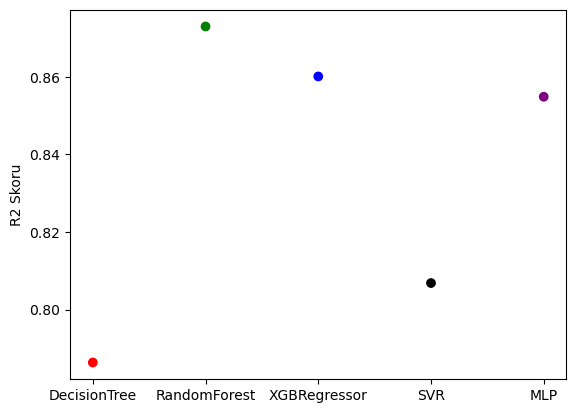

In [23]:
keys = list(model_scores.keys())
values = list(model_scores.values())
plt.figure()
plt.scatter(keys, values, c=list(model_colors.values()))
plt.ylabel('R2 Skoru')
plt.show()

Modellerin başlangıç eğitim süreleri.

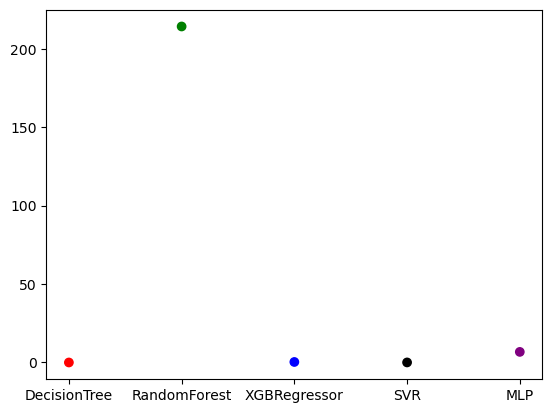

In [24]:
keys = list(model_times.keys())
values = list(model_times.values())
plt.figure()
plt.scatter(keys, values, c=list(model_colors.values()))
plt.show()

Modelleri 20 kez eğitip sonuçları karşılaştıracağız.

In [25]:
iterative_model_scores = {
    'DecisionTree': [],
    'RandomForest': [],
    'XGBRegressor': [],
    'SVR': [],
    'MLP': []
}

iterative_model_times = {
    'DecisionTree': [],
    'RandomForest': [],
    'XGBRegressor': [],
    'SVR': [],
    'MLP': []
}

In [26]:
import random

for i in range(20):
    xgb_i = XGBRegressor(random_state=random.randint(1, 100))
    xgb_time_i = time.time()
    xgb_score_i = cross_val_score(xgb_i, X, y, cv=5, scoring='r2')
    xgb_time_i = time.time() - xgb_time_i
    iterative_model_scores['XGBRegressor'].append(xgb_score_i.mean())
    iterative_model_times['XGBRegressor'].append(xgb_time_i)

    dtr_i = DecisionTreeRegressor(criterion='squared_error', max_depth=10)
    dtr_time_i = time.time()
    dtr_score_i = cross_val_score(dtr_i, X, y, cv=5, scoring='r2')
    dtr_time_i = time.time() - dtr_time_i
    iterative_model_scores['DecisionTree'].append(dtr_score_i.mean())
    iterative_model_times['DecisionTree'].append(dtr_time_i)

    rfr_i = RandomForestRegressor(max_depth=rfr_grid.best_params_['max_depth'], max_features=rfr_grid.best_params_['max_features'], n_estimators=rfr_grid.best_params_['n_estimators'])
    rfr_time_i = time.time()
    rfr_i.fit(X_train, y_train)
    rfr_time_i = time.time() - rfr_time_i
    iterative_model_scores['RandomForest'].append(rfr_i.score(X_test, y_test))
    iterative_model_times['RandomForest'].append(rfr_time_i)

    svr_i = SVR(C=1.0, epsilon=0.2)
    svr_time_i = time.time()    
    svr_score_i = cross_val_score(svr_i, X, y, cv=5, scoring='r2')
    svr_time_i = time.time() - svr_time_i
    iterative_model_scores['SVR'].append(svr_score_i.mean())
    iterative_model_times['SVR'].append(svr_time_i)

    mlp_i = MLPRegressor(random_state=random.randint(1, 100), max_iter=5000)
    mlp_time_i = time.time()
    mlp_score_i = cross_val_score(mlp_i, X, y, cv=5, scoring='r2')
    mlp_time_i = time.time() - mlp_time_i
    iterative_model_scores['MLP'].append(mlp_score_i.mean())
    iterative_model_times['MLP'].append(mlp_time_i)

Modellerin iteratif $R^2$ skorları.

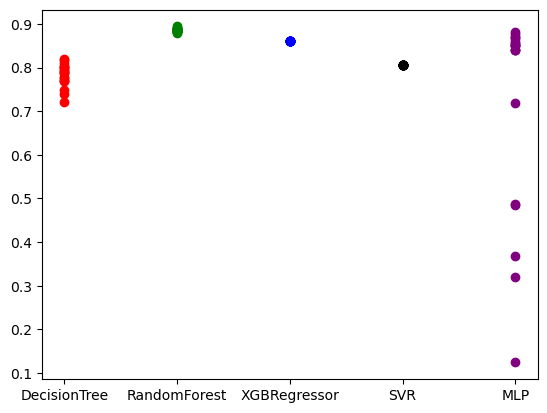

In [27]:
keys = list(iterative_model_scores.keys())
values = list(iterative_model_scores.values())
plt.figure()
for key in keys:
    key_array = [key for i in range(20)]
    value_array = iterative_model_scores[key]
    plt.scatter(key_array, value_array, c=model_colors[key])
plt.show()

Modellerin iteratif eğitim süreleri.

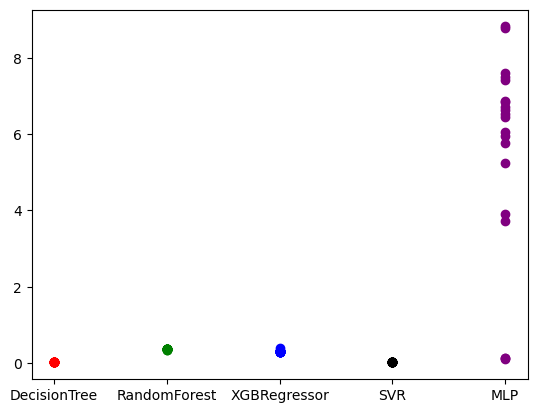

In [28]:
keys = list(iterative_model_times.keys())
values = list(iterative_model_times.values())
plt.figure()
for key in keys:
    key_array = [key for i in range(20)]
    value_array = iterative_model_times[key]
    plt.scatter(key_array, value_array, c=model_colors[key])
plt.show()